# Binarization and Morphology

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
print(sys.version)
print(np.__version__)
print(cv2.__version__)

3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
1.19.2
4.5.1


(180, 173)

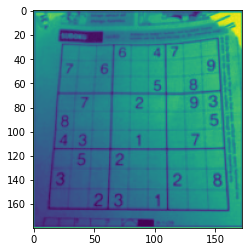

In [59]:
img = cv2.imread('assets/sudoku.png', 0) # second argument for one-channel
display(img.shape)
plt.imshow(img)
plt.show()

## Binarization

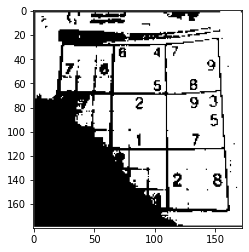

In [19]:
ret, dst = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')
plt.show()

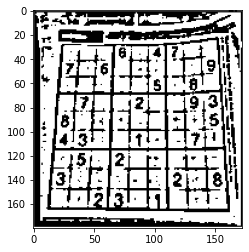

In [20]:
dst_adap = cv2.adaptiveThreshold(img, 255, 
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 11, 2)
plt.imshow(dst_adap, cmap='gray')
plt.show()

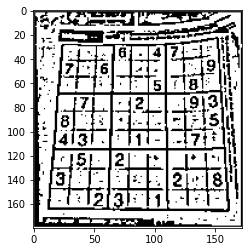

In [21]:
dst_adap = cv2.adaptiveThreshold(img, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 11, 2)
plt.imshow(dst_adap, cmap='gray')
plt.show()

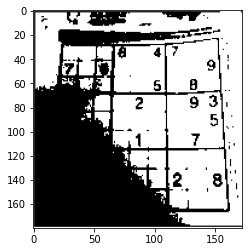

In [22]:
ret_o, dst_o = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(dst_o, cmap='gray')
plt.show()

In [24]:
ret_o

107.0

## Morphology

(183, 722)

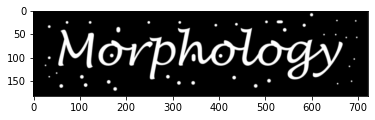

In [25]:
img_morp = cv2.imread("assets/morphology2.png", 0)
display(img_morp.shape)
plt.imshow(img_morp, cmap='gray')
plt.show()

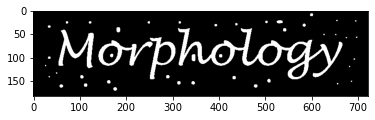

In [26]:
ret, th = cv2.threshold(img_morp, 127, 255, cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')
plt.show()

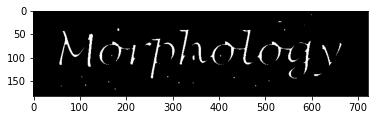

In [27]:
kernel = np.ones((5,5), dtype = np.uint8)

erosion = cv2.erode(th, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.show()

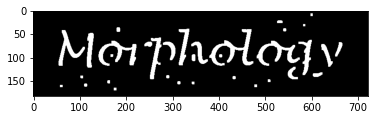

In [28]:
dilation = cv2.dilate(erosion, kernel, iterations = 1)
plt.imshow(dilation, cmap='gray')
plt.show()

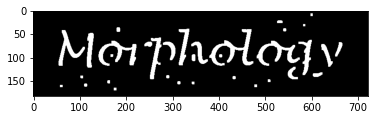

In [29]:
kernel = np.ones((5,5), dtype = np.uint8)

open = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(open, cmap='gray')
plt.show()

## Task - count numbers

(180, 173)

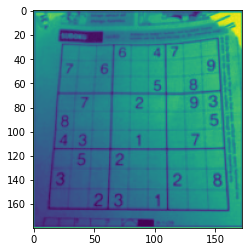

In [33]:
img = cv2.imread("assets/sudoku.png", 0)
display(img.shape)
plt.imshow(img)
plt.show()

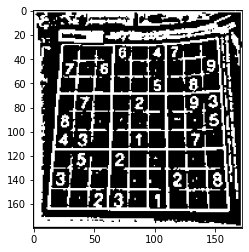

In [40]:
dst_adap = cv2.adaptiveThreshold(img, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY_INV,
                                 21, 2)
plt.imshow(dst_adap, cmap='gray')
plt.show()

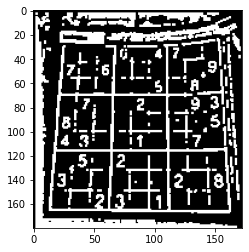

In [53]:
kernel = np.ones((2, 2), dtype = np.uint8)

open = cv2.morphologyEx(dst_adap, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(open, cmap='gray')
plt.show()

(436, 580)

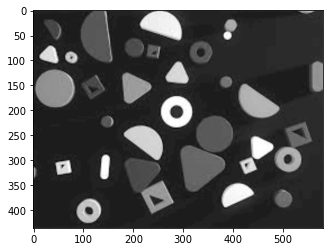

In [61]:
img = cv2.imread('assets/count_objects.png', 0)
display(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

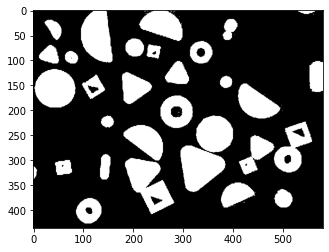

In [62]:
ret, dst = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')
plt.show()

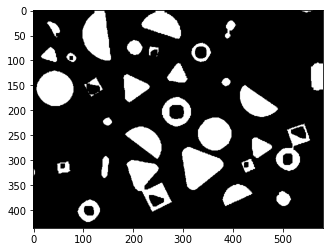

In [63]:
kernel = np.ones((7,7), dtype = np.uint8)

erosion = cv2.erode(dst, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.show()

## Countours

In [67]:
contours, hier = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

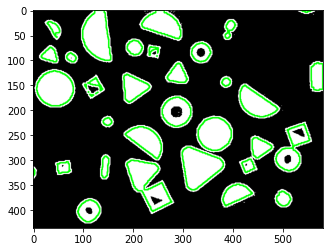

In [69]:
vis = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
img_cnts = cv2.drawContours(vis, contours, -1, (0, 255, 0), 2)
plt.imshow(img_cnts)
plt.show()

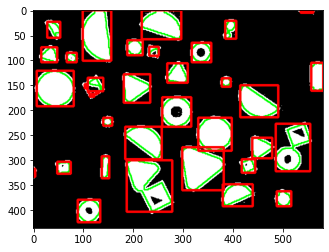

In [70]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img_cnts, (x,y), (x+w, y+h), (255,0,0), 3)

plt.imshow(img_cnts)
plt.show()

In [71]:
len(contours)

39

## Count letters 

(178, 283)

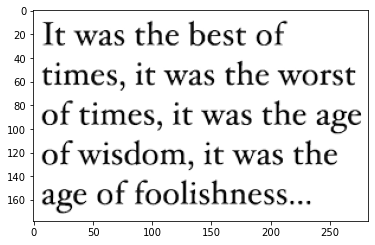

In [73]:
img = cv2.imread('assets/small_text.png', 0)
display(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

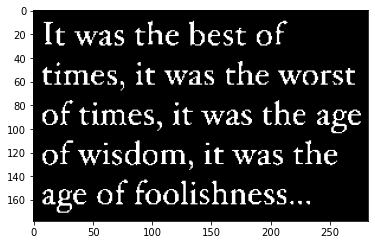

In [74]:
ret_o, dst_o = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(dst_o, cmap='gray')
plt.show()

In [75]:
contours, hier = cv2.findContours(dst_o, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

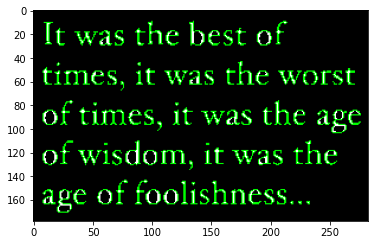

In [80]:
vis = cv2.cvtColor(dst_o, cv2.COLOR_GRAY2BGR)
img_cnts = cv2.drawContours(vis, contours, -1, (0,255,0), 1)
plt.imshow(img_cnts)
plt.show()

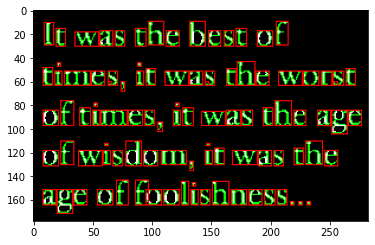

In [81]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img_cnts, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(img_cnts)
plt.show()

In [82]:
len(contours)

98